<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/IQR_Method_on_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Combined County Data Cleansed.csv')

# Make a copy for comparison later
df_original = df.copy()

# Dictionary to store outlier counts
outlier_counts = {}

# Function to replace outliers with median using IQR method
def handle_outliers_iqr(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median = dataframe[col].median()

        # Detect outliers
        outliers = (dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)
        outlier_count = outliers.sum()
        outlier_counts[col] = outlier_count

        # Replace outliers with the median
        dataframe.loc[outliers, col] = median

    return dataframe

# Apply the function
df_cleaned = handle_outliers_iqr(df)

# Compare statistics
numeric_cols = df.select_dtypes(include=['number']).columns

print("\n--- Outlier Replacement Summary ---")
for col in numeric_cols:
    print(f"{col}: {outlier_counts[col]} outliers replaced")

print("\n--- Statistical Summary Before vs After ---")
summary_before = df_original[numeric_cols].describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'})
summary_after = df_cleaned[numeric_cols].describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'})

comparison = pd.concat([summary_before.add_suffix('_before'), summary_after.add_suffix('_after')], axis=1)
print(comparison)

# Optionally save the cleaned dataset
df_cleaned.to_csv('df_iqr.csv', index=False)



--- Outlier Replacement Summary ---
Value: 0 outliers replaced
Avg Max Temp: 0 outliers replaced
Avg Min Temp: 0 outliers replaced
Avg Temp: 0 outliers replaced
Avg Bare Soil Temp: 0 outliers replaced
Avg Turf Soil Temp: 0 outliers replaced
Avg Wind Speed: 7 outliers replaced
Avg Max Wind Speed: 10 outliers replaced
Total Solar Rad: 0 outliers replaced
Avg Penman PET: 0 outliers replaced
Total Penman PET: 0 outliers replaced
Total Rainfall: 5 outliers replaced
Avg Dew Point: 3 outliers replaced
Avg Wind Chill: 0 outliers replaced

--- Statistical Summary Before vs After ---
                    mean_before  median_before  std_before  mean_after  \
Value                 94.711538       92.45000   35.748752   94.711538   
Avg Max Temp          59.099552       59.88125    3.773902   59.099552   
Avg Min Temp          35.918376       35.96275    2.773045   35.918376   
Avg Temp              47.506944       47.67100    3.045846   47.506944   
Avg Bare Soil Temp    49.042607       49.11500  

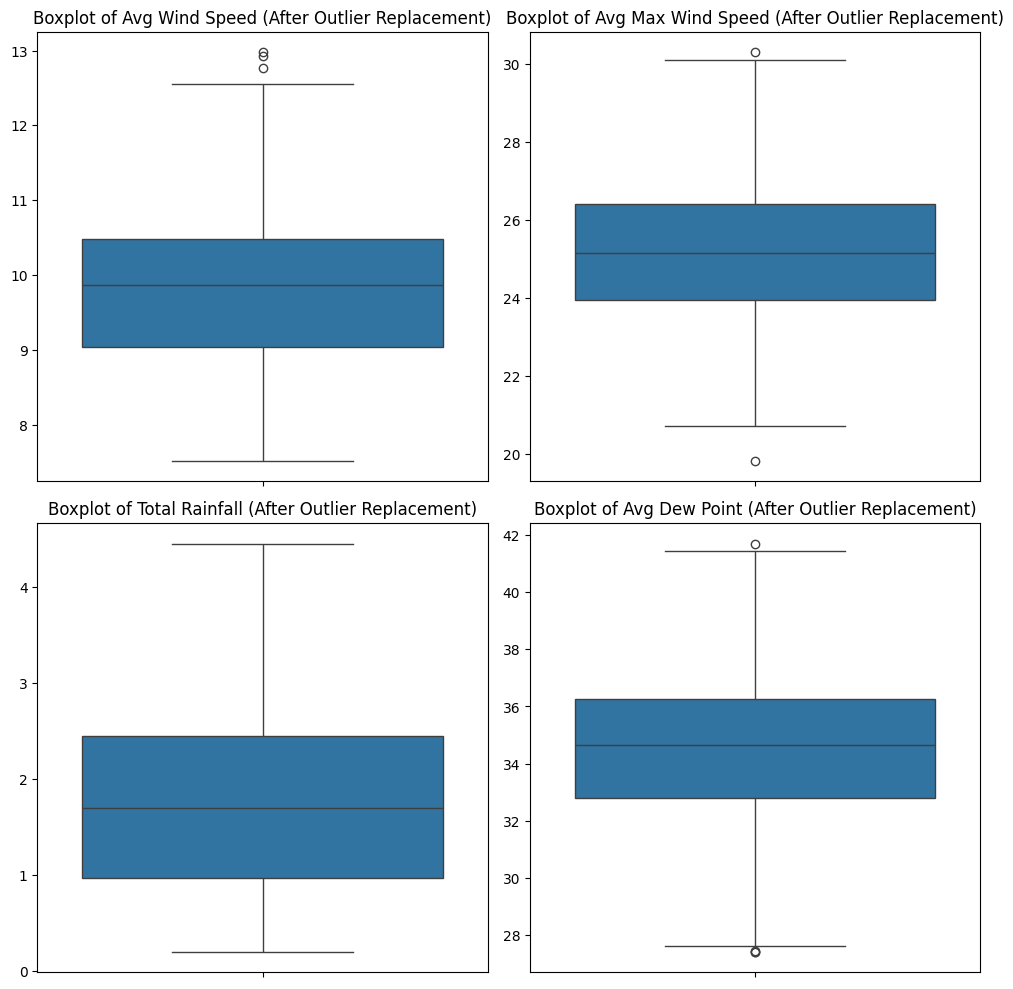

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns from the cleaned dataframe
numeric_cols_cleaned = df_cleaned.select_dtypes(include=['number']).columns

# Filter columns that had outliers replaced
cols_with_outliers = [col for col, count in outlier_counts.items() if count > 0]

# Create boxplots for each numeric column that had outliers
plt.figure(figsize=(10, 10))
for i, col in enumerate(cols_with_outliers):
    plt.subplot(2, 2, i + 1) # Adjusted subplot grid based on the number of columns with outliers
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Replacement)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [14]:
# Access multiple values by integer position using .iloc
print(df_original['Avg Wind Speed'].iloc[[45, 49, 53, 57, 83, 92, 251]])

45     13.2530
49     13.2530
53     13.2530
57     13.2530
83     14.4415
92     14.1025
251    13.2205
Name: Avg Wind Speed, dtype: float64


In [15]:
print(df_cleaned['Avg Wind Speed'].iloc[[45, 49, 53, 57, 83, 92, 251]])

45     9.8715
49     9.8715
53     9.8715
57     9.8715
83     9.8715
92     9.8715
251    9.8715
Name: Avg Wind Speed, dtype: float64


In [16]:
print(df_original['Avg Max Wind Speed'].iloc[[83, 122, 146, 152, 177, 183, 215, 216, 217, 251]])

83     31.8685
122    18.3790
146    36.0010
152    19.1055
177    36.0010
183    19.1055
215    19.3555
216    19.2625
217    19.0020
251    31.1415
Name: Avg Max Wind Speed, dtype: float64


In [17]:
print(df_cleaned['Avg Max Wind Speed'].iloc[[83, 122, 146, 152, 177, 183, 215, 216, 217, 251]])

83     25.14925
122    25.14925
146    25.14925
152    25.14925
177    25.14925
183    25.14925
215    25.14925
216    25.14925
217    25.14925
251    25.14925
Name: Avg Max Wind Speed, dtype: float64


In [18]:
print(df_original['Total Rainfall'].iloc[[24, 186, 216, 226, 262]])

24     4.8550
186    5.1585
216    6.1945
226    5.0360
262    5.0360
Name: Total Rainfall, dtype: float64


In [19]:
print(df_cleaned['Total Rainfall'].iloc[[24, 186, 216, 226, 262]])

24     1.70725
186    1.70725
216    1.70725
226    1.70725
262    1.70725
Name: Total Rainfall, dtype: float64


In [20]:
print(df_original['Avg Dew Point'].iloc[[135, 166, 201]])

135    26.8045
166    26.8045
201    42.0405
Name: Avg Dew Point, dtype: float64


In [23]:
print(df_cleaned['Avg Dew Point'].iloc[[135, 166, 201]])

135    34.6515
166    34.6515
201    34.6515
Name: Avg Dew Point, dtype: float64
